<a href="https://colab.research.google.com/github/naveenkumar1805/python_projects/blob/main/car_price_prediction_%20ridge%20and%20lasso.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [6]:
import pandas as pd
import numpy as np
from numpy import math
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

import warnings
warnings.filterwarnings('ignore')



In [7]:
df=pd.read_csv('/content/drive/MyDrive/Copy of CarPrice_project.csv')

In [8]:
df.shape

(205, 26)

In [9]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [11]:
df.describe(include='all')

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205,205,205,205,205,205,205,205.000000,...,205.000000,205,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
unique,NaN,NaN,147,2,2,2,5,3,2,NaN,...,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,toyota corona,gas,std,four,sedan,fwd,front,NaN,...,NaN,mpfi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,6,185,168,115,96,120,202,NaN,...,NaN,94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,103.000000,0.834146,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.756585,...,126.907317,NaN,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.021776,...,41.642693,NaN,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.600000,...,61.000000,NaN,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.500000,...,97.000000,NaN,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.000000,...,120.000000,NaN,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.400000,...,141.000000,NaN,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000


In [12]:
len(df[df.duplicated()])

0

In [13]:
df.duplicated().sum()

0

In [14]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [15]:
df.isna().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

**Exploratory Data analysis**

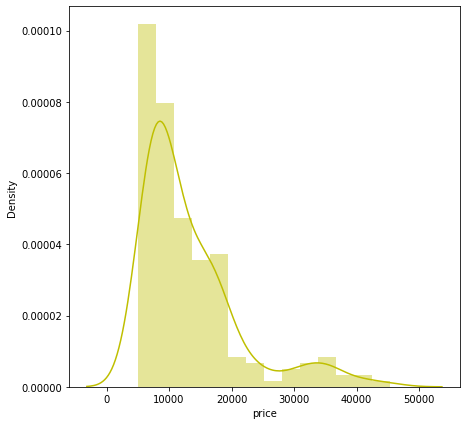

In [16]:
#look dependent variable distribution
plt.figure(figsize=(7,7))
sns.distplot(df['price'],color='y');

In [17]:
df['price'].skew()

1.7776781560914454

In [18]:
price_log=np.log(df['price'])
price_log.skew()

0.672888533977329

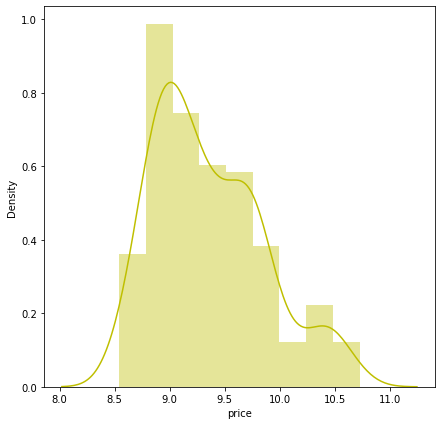

In [19]:
#log transformation

plt.figure(figsize=(7,7))
sns.distplot(price_log,color='y');

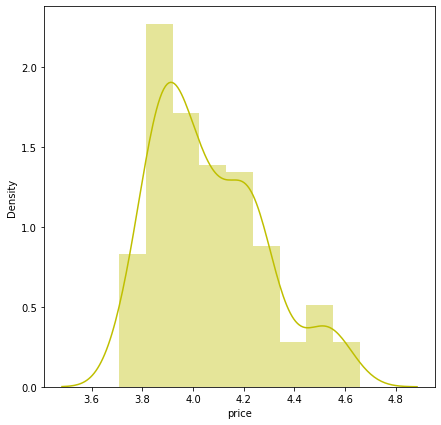

In [20]:
#log 10 transformation
plt.figure(figsize=(7,7))
sns.distplot(np.log10(df['price']),color='y');

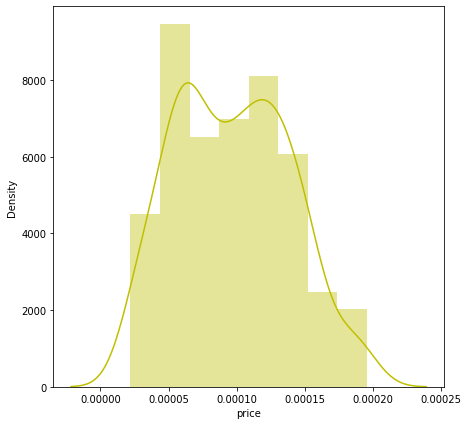

In [21]:
#inversse transformation
plt.figure(figsize=(7,7))
sns.distplot(np.reciprocal(df['price']),color='y');

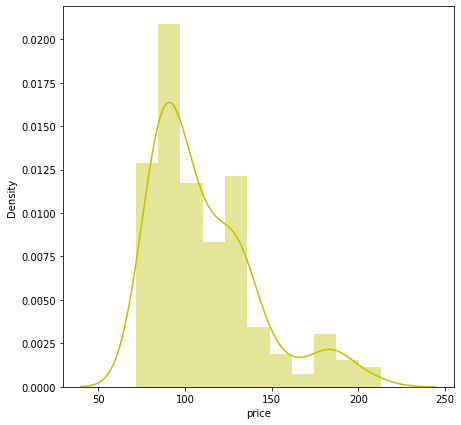

In [22]:
#square transformation
plt.figure(figsize=(7,7))
sns.distplot(np.sqrt(df['price']),color='y');

In [23]:
# extract numeric features
numeric_features=df.describe().columns
numeric_features

Index(['car_ID', 'symboling', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

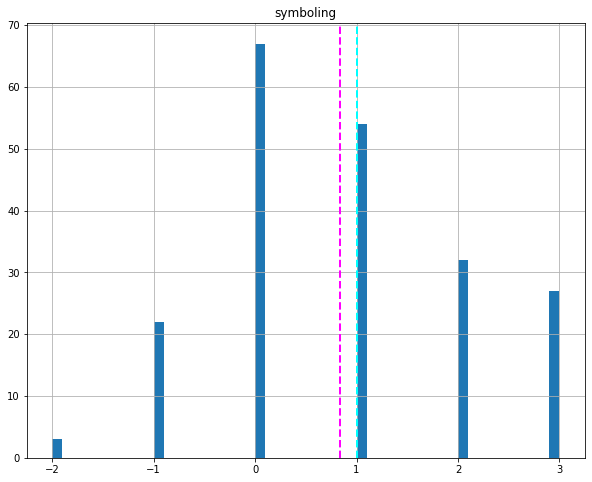

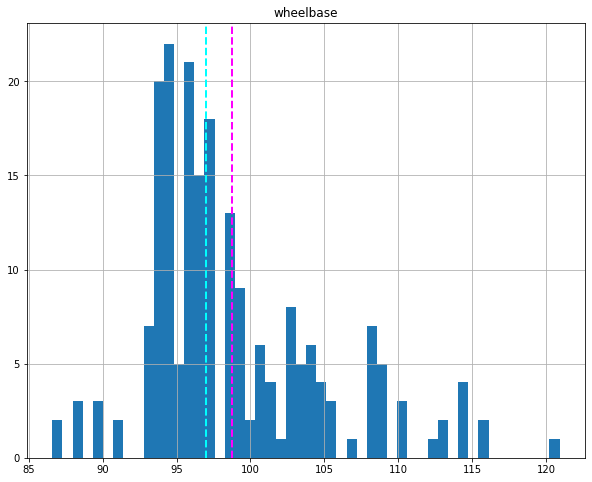

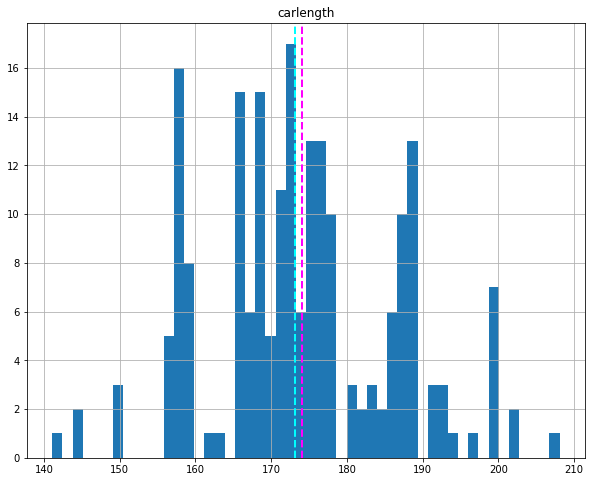

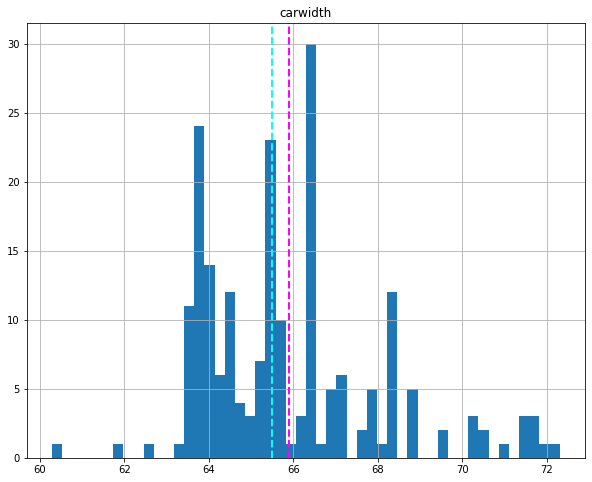

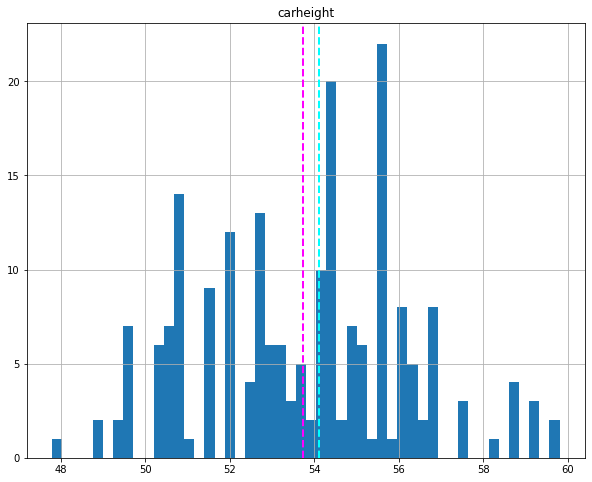

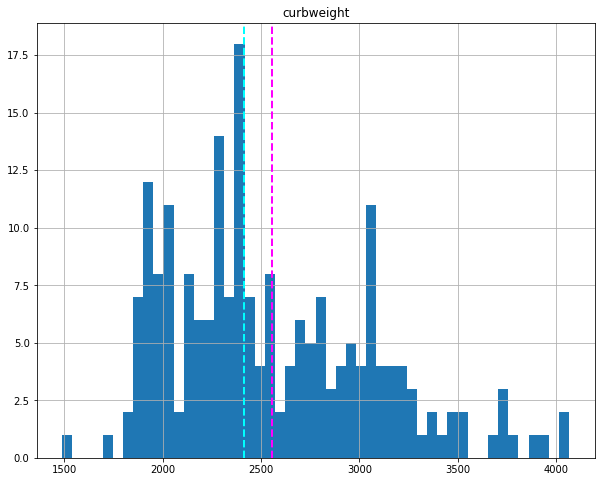

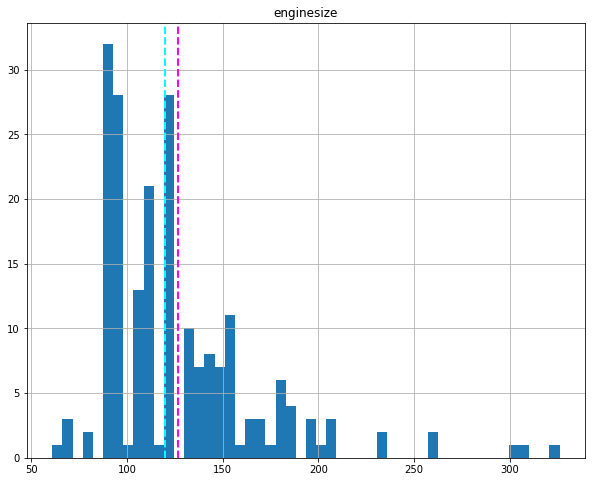

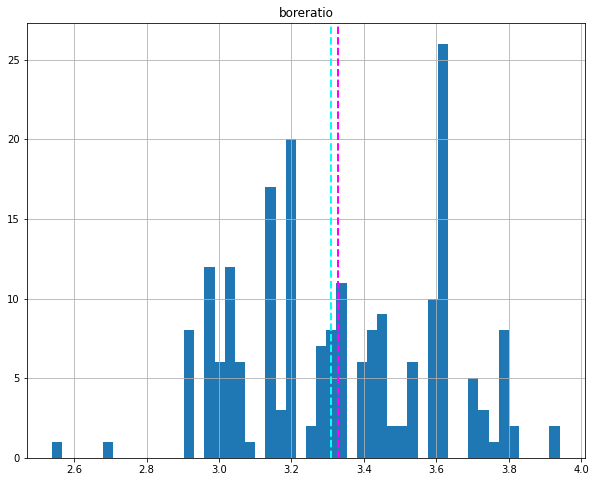

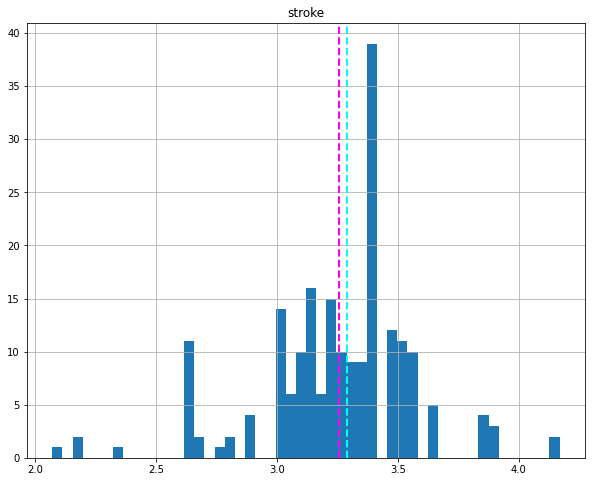

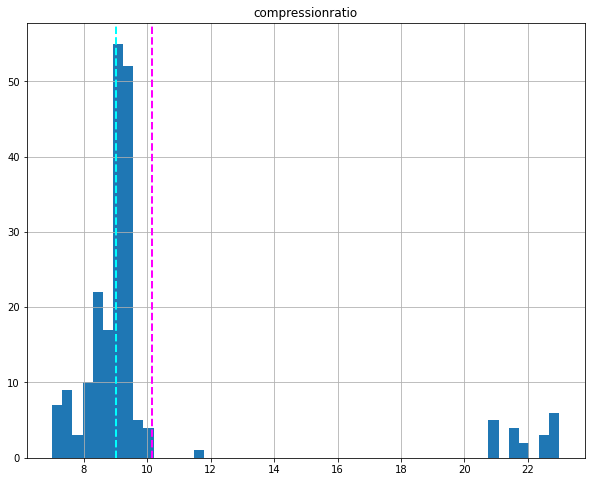

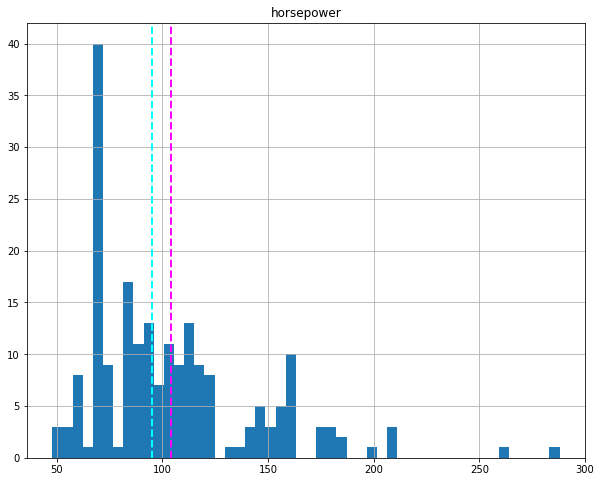

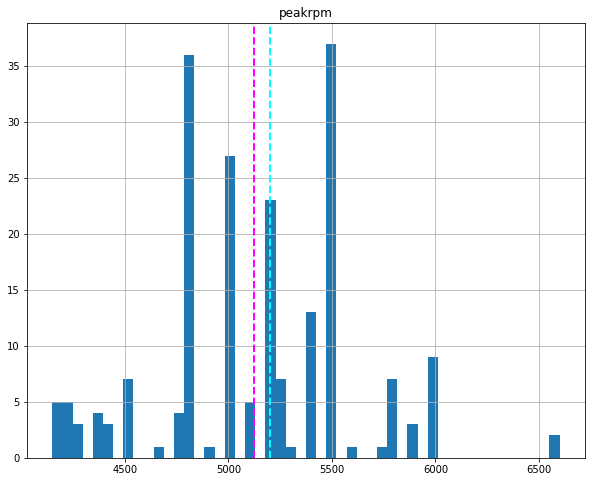

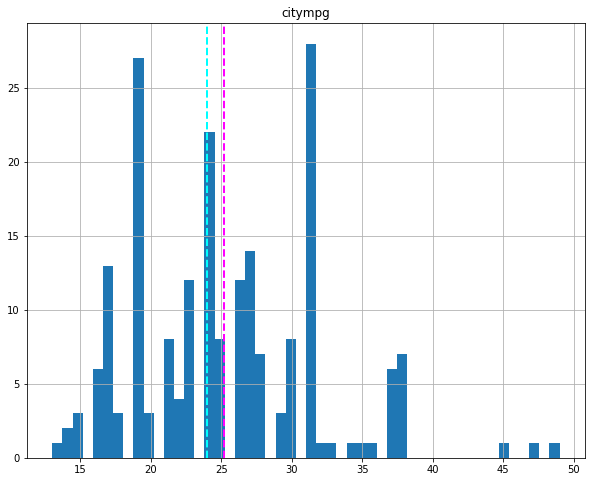

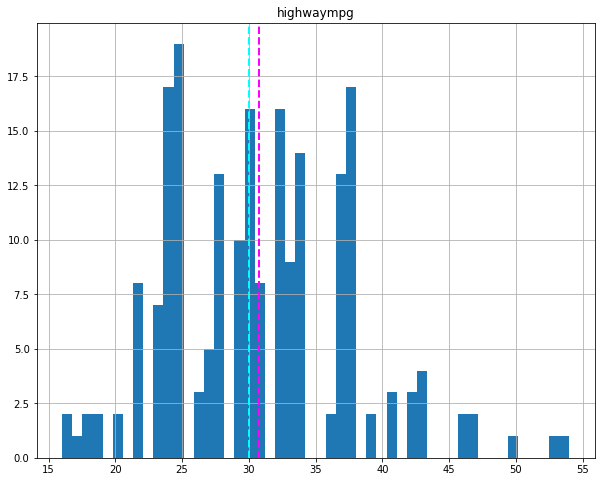

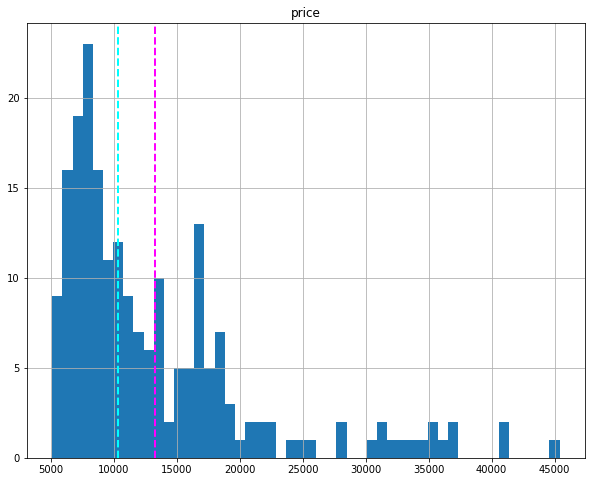

In [24]:
# plot a bar plot for each numeric features count except car_id


for col in numeric_features[1:]:
  fig=plt.figure(figsize=(10,8))
  ax=fig.gca()
  features=df[col]
  features.hist(bins=50,ax=ax)
  ax.axvline(features.mean(),color='magenta',linestyle='dashed',linewidth=2)
  ax.axvline(features.median(),color='cyan',linestyle='dashed',linewidth=2)
  ax.set_title(col)

plt.show()


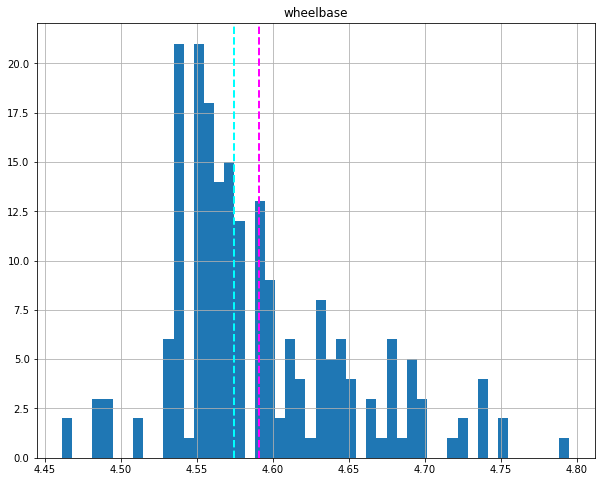

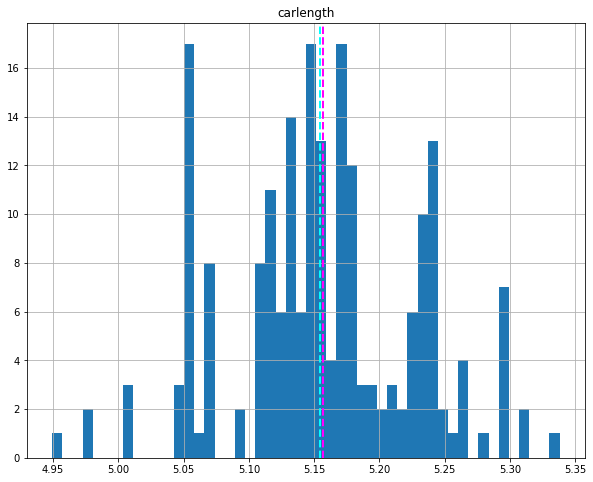

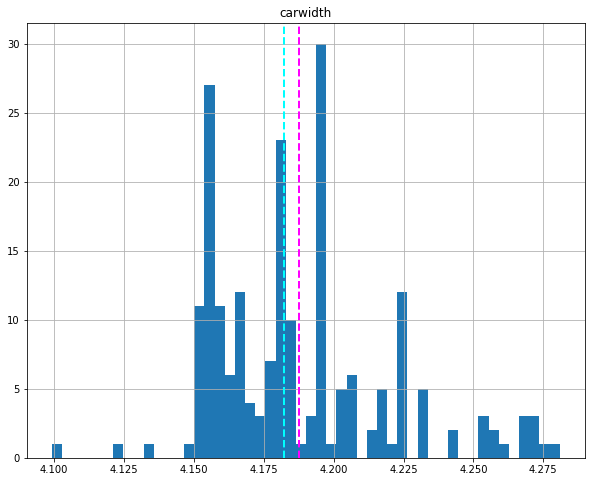

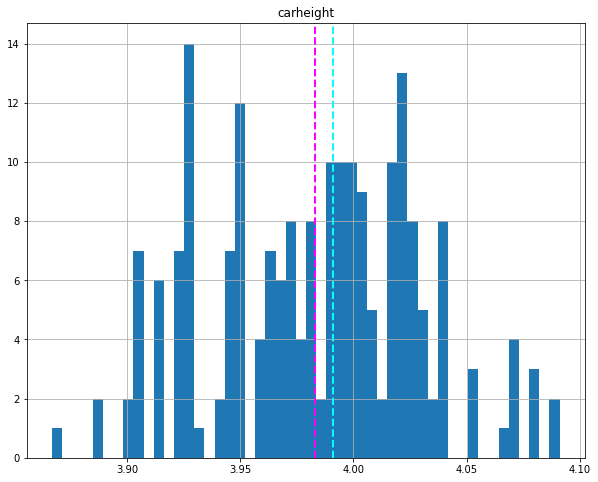

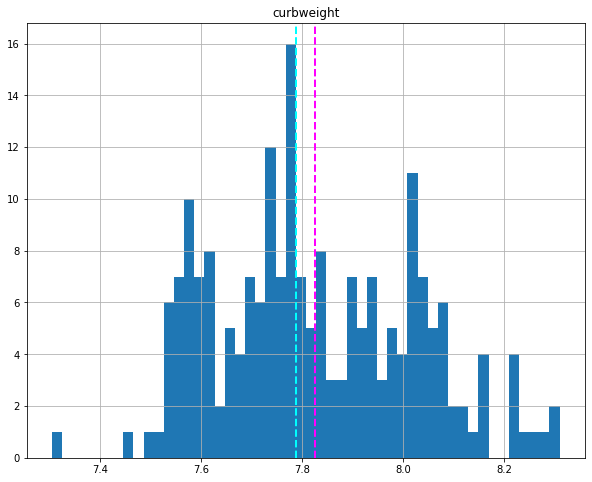

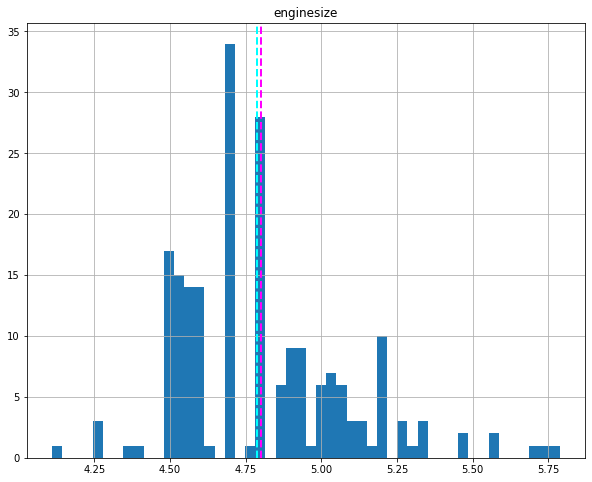

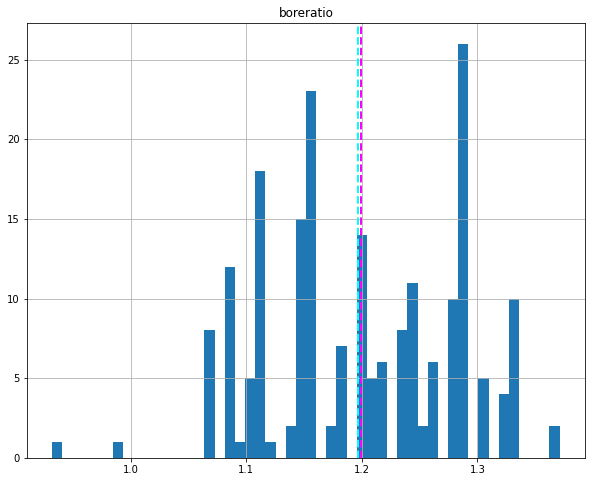

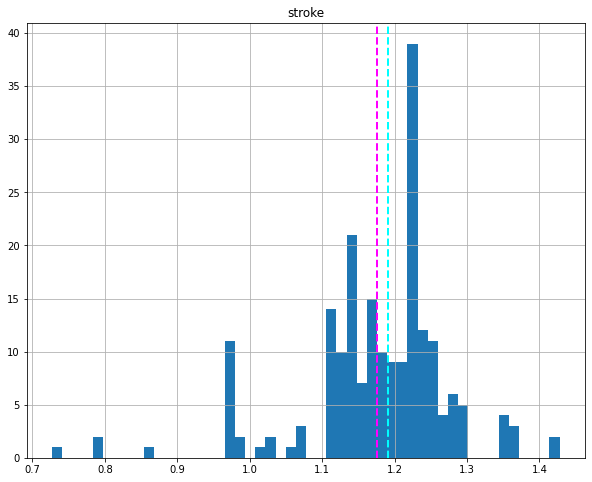

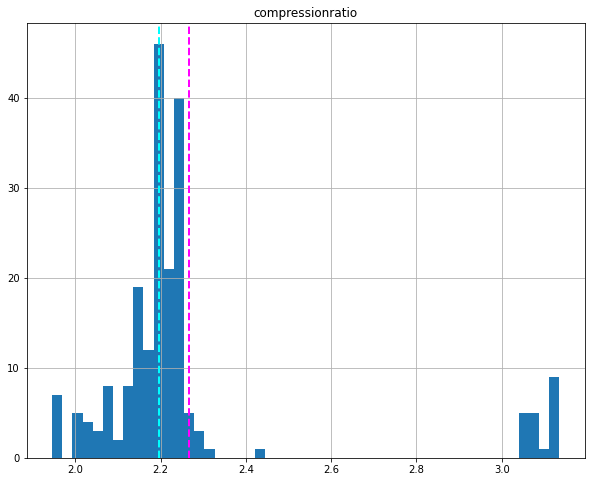

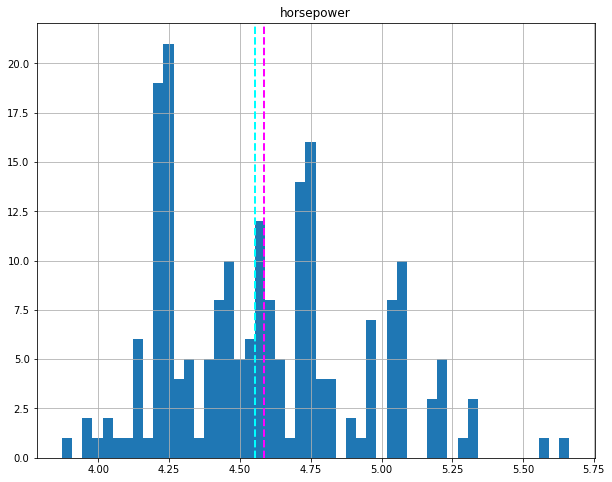

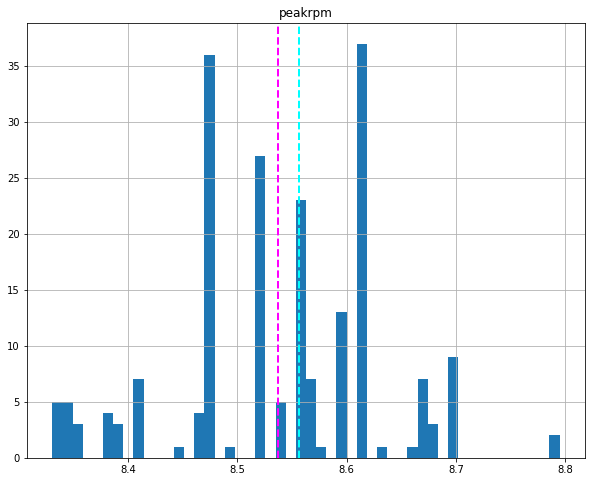

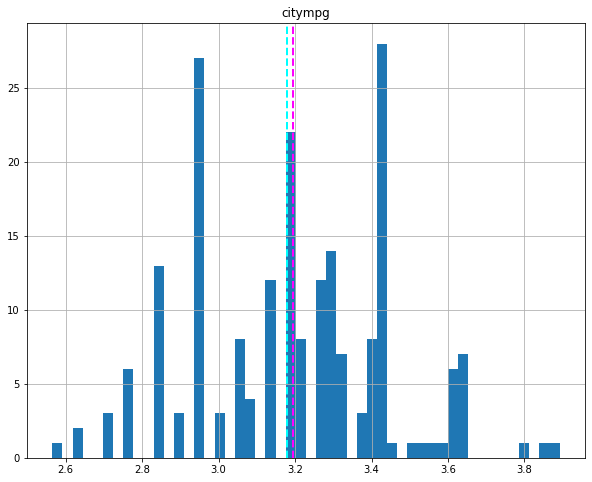

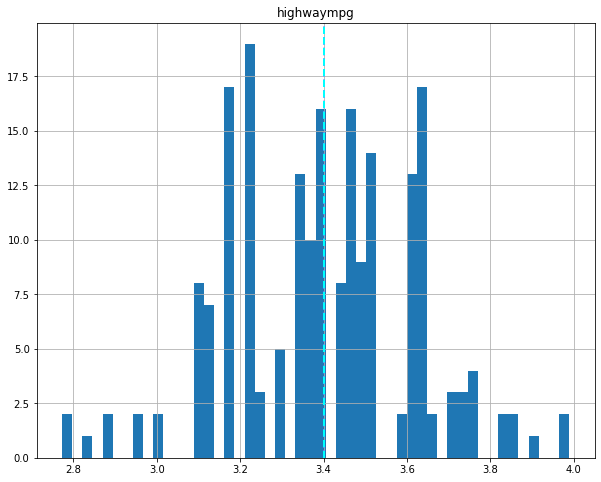

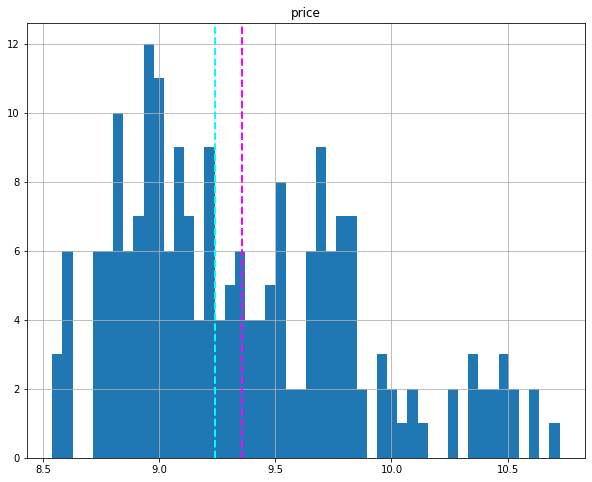

In [25]:
# plot a bar plot for each numeric features count except car_id


for col in numeric_features[2:]:
  fig=plt.figure(figsize=(10,8))
  ax=fig.gca()
  features=np.log(df[col])
  features.hist(bins=50,ax=ax)
  ax.axvline(features.mean(),color='magenta',linestyle='dashed',linewidth=2)
  ax.axvline(features.median(),color='cyan',linestyle='dashed',linewidth=2)
  ax.set_title(col)

plt.show()


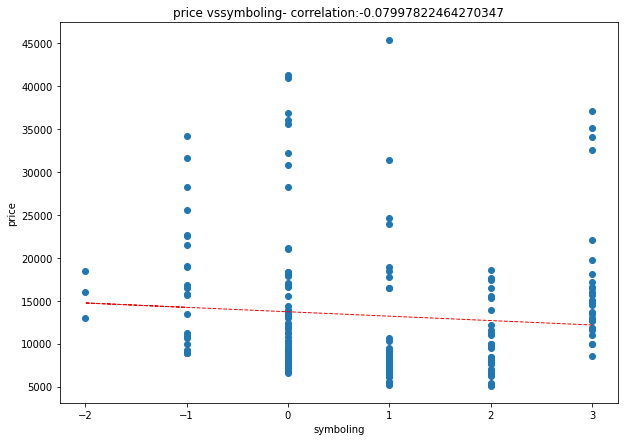

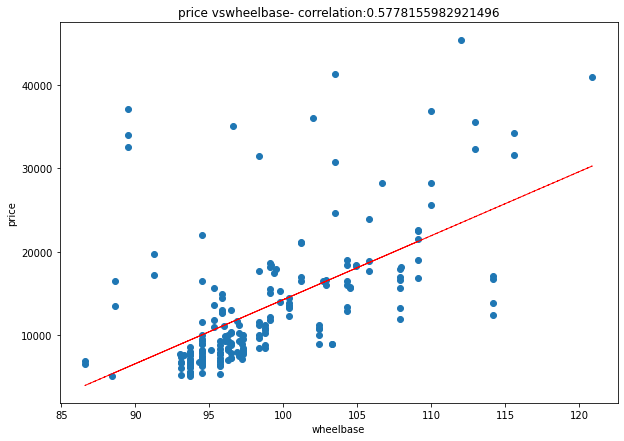

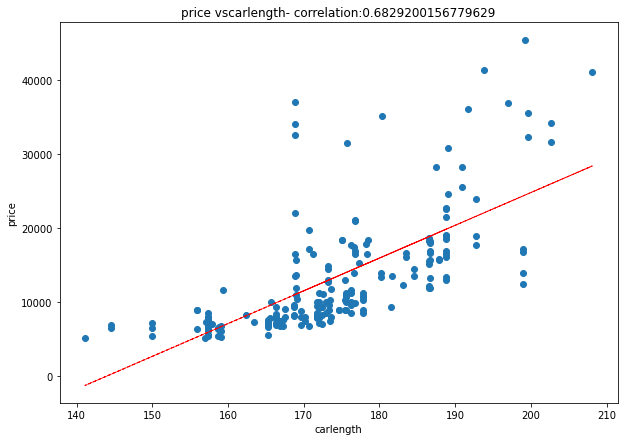

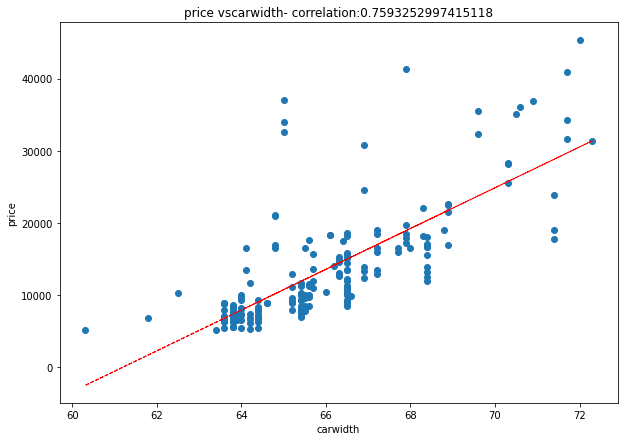

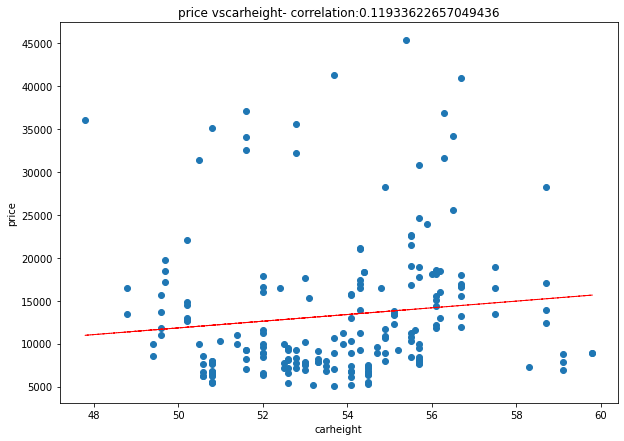

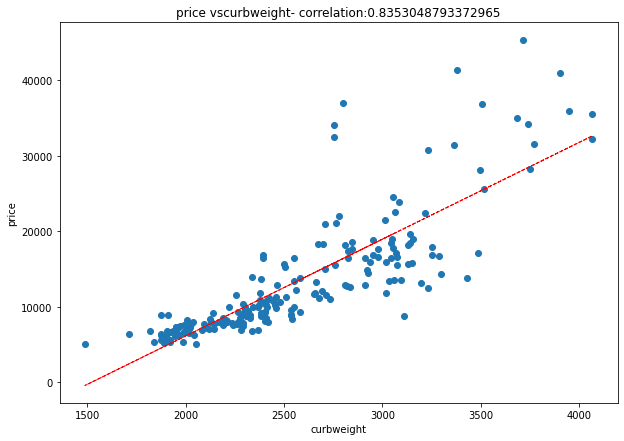

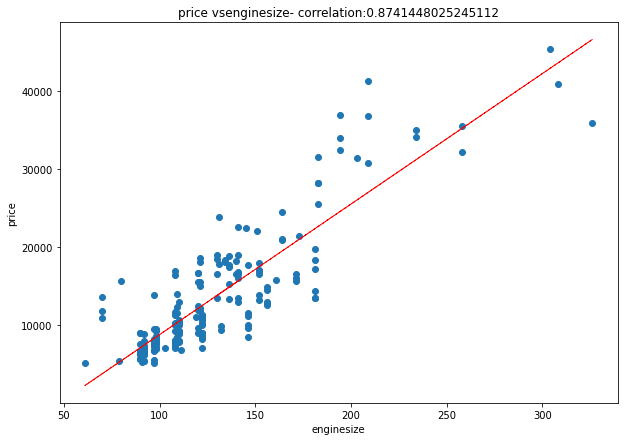

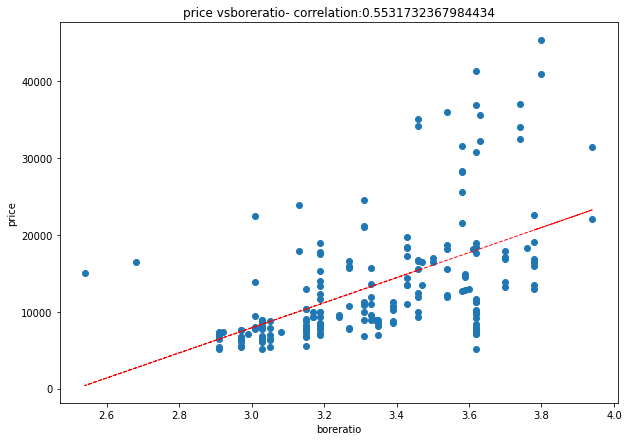

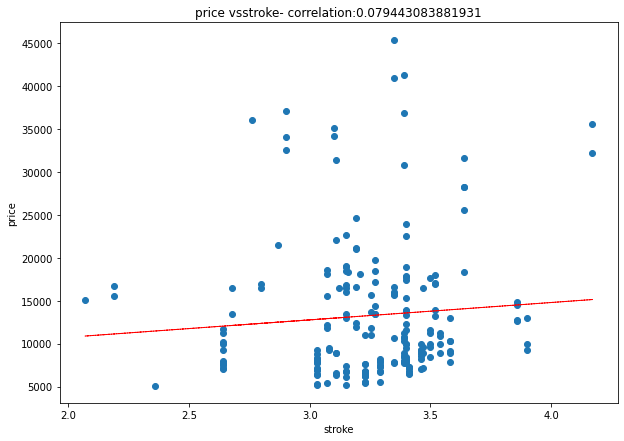

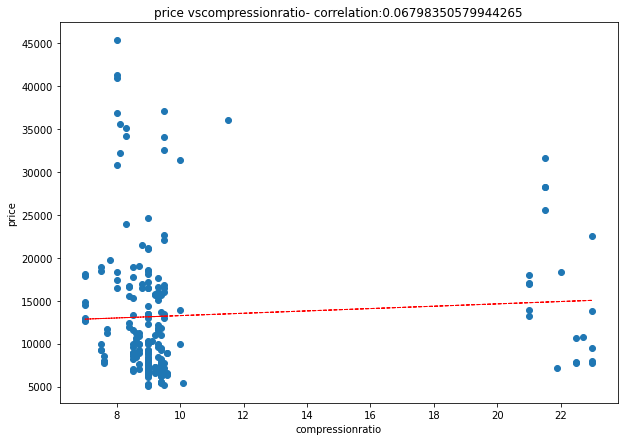

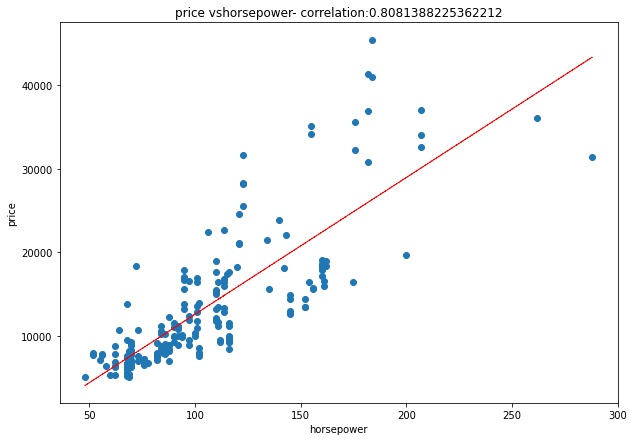

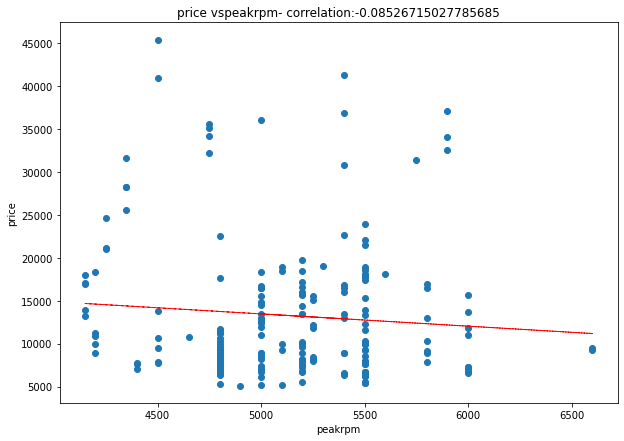

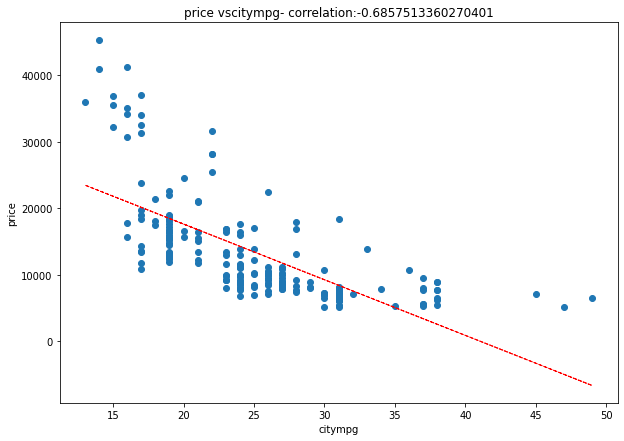

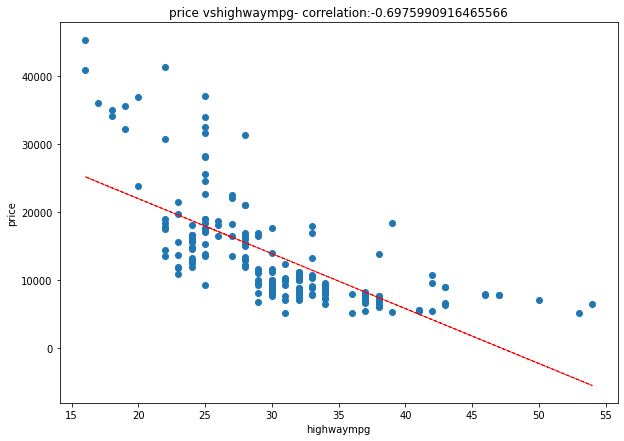

In [26]:
for col in numeric_features[1:-1]:
  fig=plt.figure(figsize=(10,7))
  ax=fig.gca()
  feature=df[col]
  label=df['price']
  correlation=feature.corr(label)
  plt.scatter(x=feature,y=label)
  plt.xlabel(col)
  plt.ylabel('price')
  ax.set_title('price vs'+ col+'- correlation:'+ str(correlation))
  z=np.polyfit(df[col],df['price'],1)
  y_hat=np.poly1d(z)(df[col])
  plt.plot(df[col],y_hat,"r--",lw=1)
plt.show()

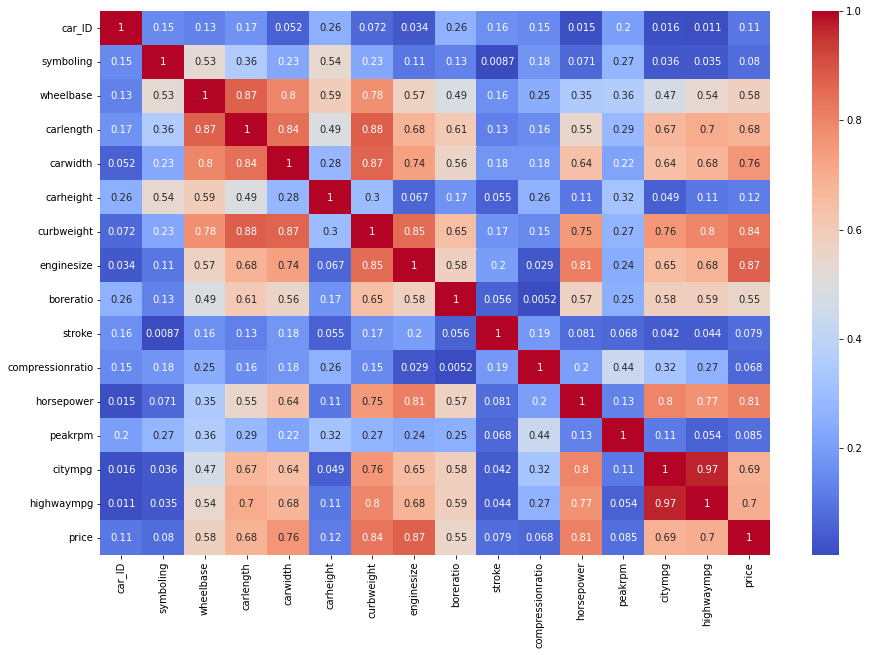

In [27]:
# correlation
plt.figure(figsize=(15,10))
correlation=df.corr()
sns.heatmap(abs(correlation),annot=True,cmap='coolwarm')

In [28]:
# removing multicolineartity

df['milege']=0.6*df['citympg']+0.4*df['highwaympg'] 
df['area']= df['carlength']*df['carwidth']

In [29]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price', 'milege', 'area'],
      dtype='object')

In [30]:
#multicolinearity

from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

  # calculating VIF

  vif=pd.DataFrame()
  vif['variables']=X.columns
  vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
  return(vif)

In [31]:
calc_vif(df[[i for i in df.describe().columns if i not in ['car_ID','price']]])

,variables,VIF
0,symboling,2.646796
1,wheelbase,2316.959780
2,carlength,6136.028870
3,carwidth,3170.397591
4,carheight,1108.503341
5,curbweight,415.172460
6,enginesize,68.941339
7,boreratio,326.471548
8,stroke,132.074737
9,compressionratio,16.465709


In [32]:
calc_vif(df[[i for i in df.describe().columns if i not in ['car_ID','price','carlength','carwidth','wheelbase','carheight','citympg','highwaympg','curbweight','boreratio']]])

,variables,VIF
0,symboling,1.819816
1,enginesize,57.154349
2,stroke,114.618316
3,compressionratio,12.520808
4,horsepower,48.288778
5,peakrpm,157.776714
6,milege,44.683738
7,area,176.798635


In [33]:
calc_vif(df[[i for i in df.describe().columns if i not in ['car_ID','price','carlength','carwidth','wheelbase','carheight','citympg','highwaympg','curbweight','boreratio','symboling','peakrpm','area','horsepower','stroke']]])

,variables,VIF
0,enginesize,5.170320
1,compressionratio,9.119143
2,milege,8.201171


In [34]:
numerical_features=['enginesize','compressionratio','milege']
numerical_features

['enginesize', 'compressionratio', 'milege']

In [35]:
df.CarName.unique()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

In [36]:
df['company']= df['CarName'].str.split(" ",expand=True)[0]


#df['company'].str.contains('vw')
df['company'] = df['company'].replace({'toyouta':'toyota','vw':'Volkswagen','vokswagen':'Volkswagen','maxda':'Mazda','porcshce':'Porsche'})

df['company']=df['company'].str.title()
df['company'].value_counts()

Toyota         32
Nissan         18
Mazda          17
Mitsubishi     13
Honda          13
Volkswagen     12
Subaru         12
Peugeot        11
Volvo          11
Dodge           9
Buick           8
Bmw             8
Audi            7
Plymouth        7
Saab            6
Porsche         5
Isuzu           4
Jaguar          3
Chevrolet       3
Alfa-Romero     3
Renault         2
Mercury         1
Name: company, dtype: int64

In [37]:
categorical_features=df.describe(include=['object','category']).columns

In [38]:
categorical_features

Index(['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber',
       'fuelsystem', 'company'],
      dtype='object')

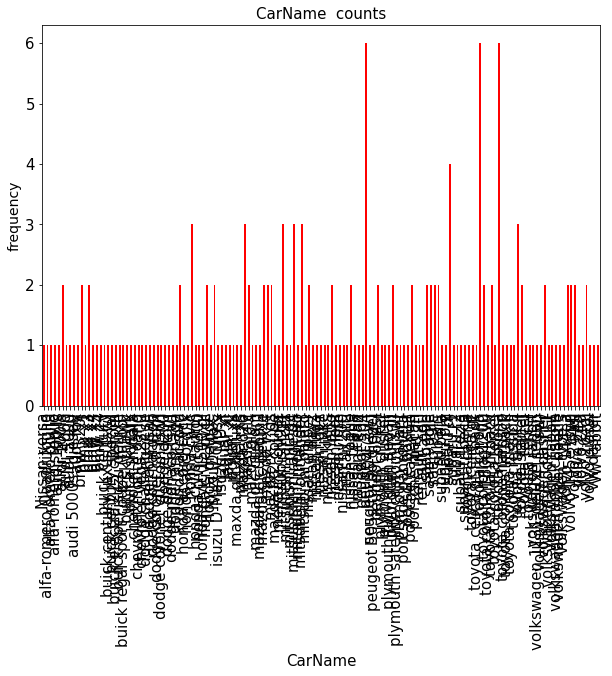

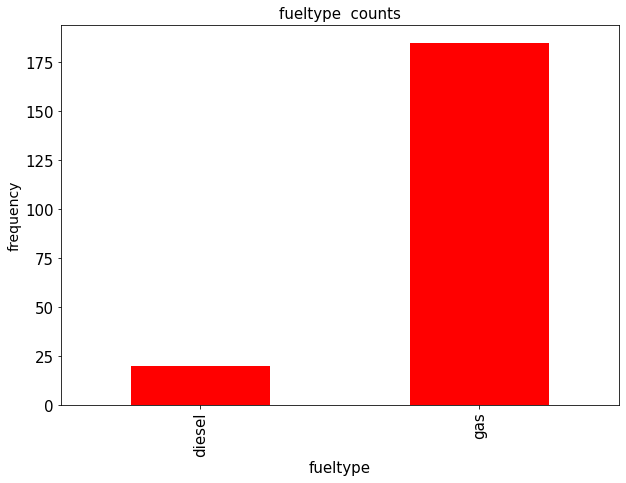

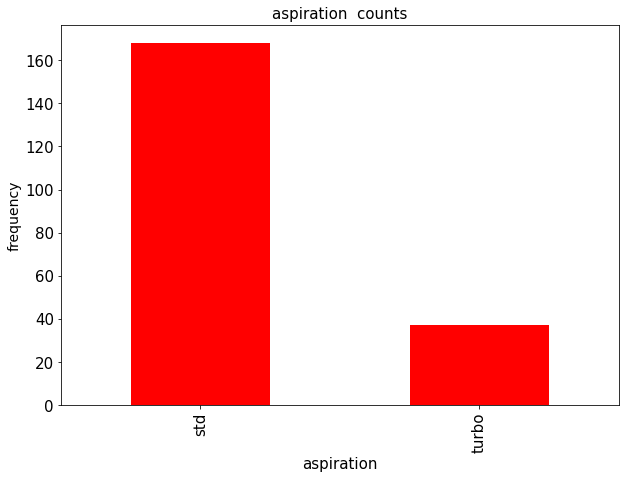

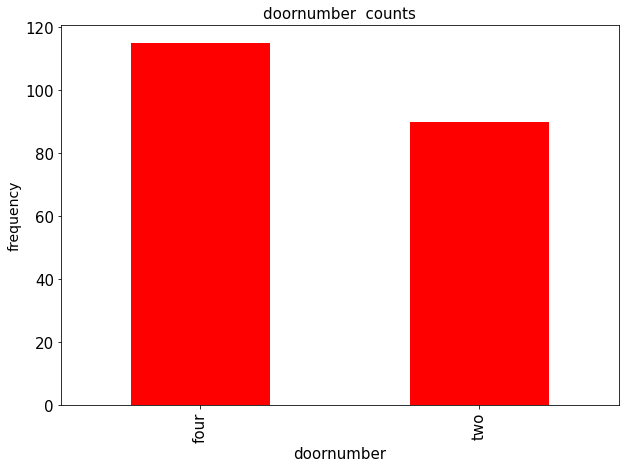

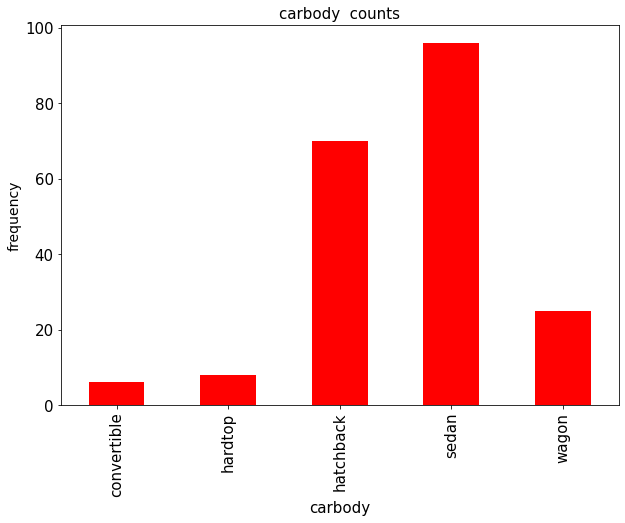

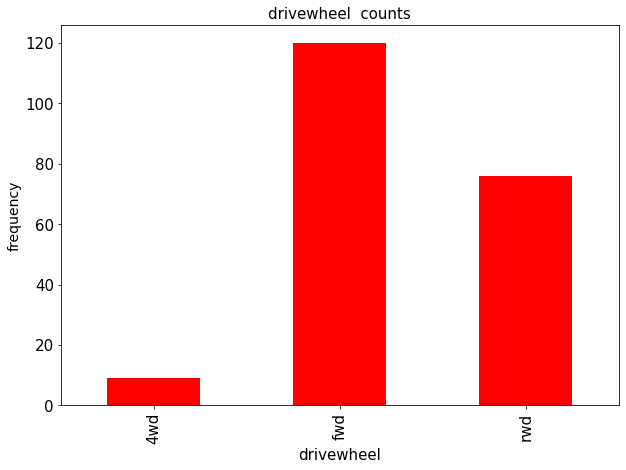

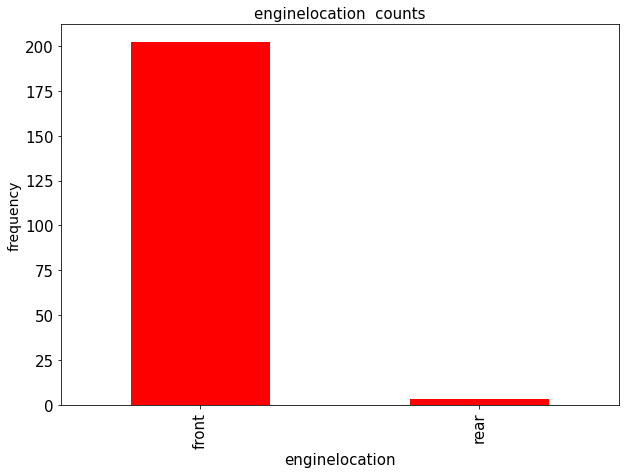

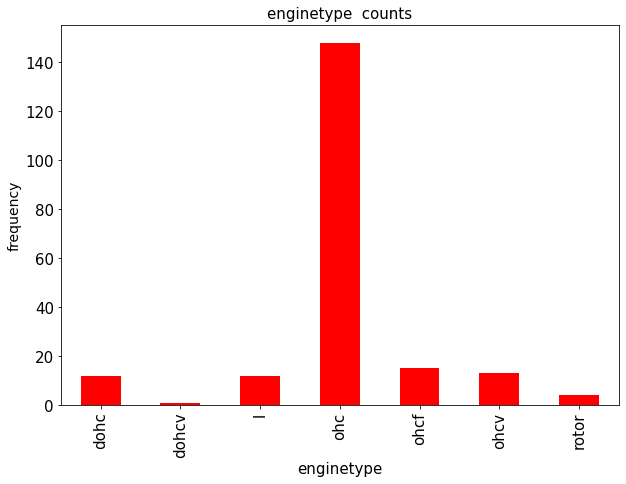

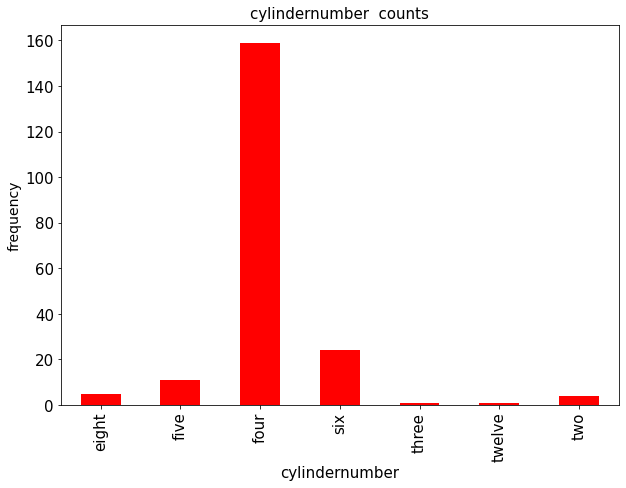

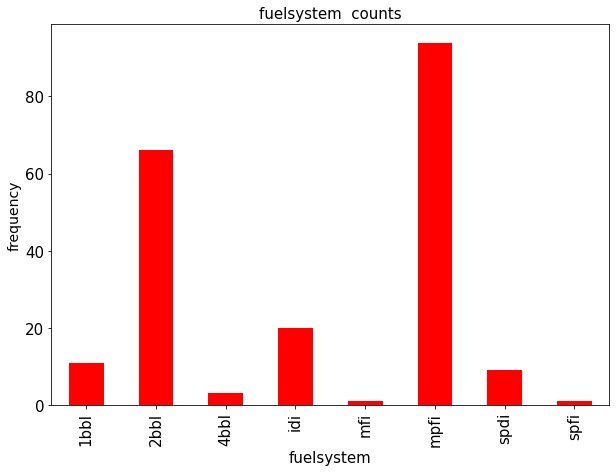

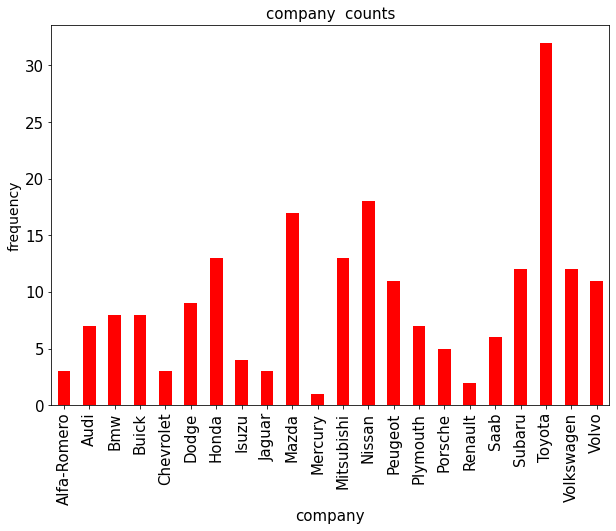

In [39]:
for col in categorical_features:
  counts=df[col].value_counts().sort_index()
  fig=plt.figure(figsize=(10,7))
  ax=fig.gca()
  counts.plot.bar(ax=ax, color='red',fontsize=15)
  ax.set_title(col +  '  counts',fontsize=15)
  ax.set_xlabel(col,fontsize=15)
  ax.set_ylabel("frequency", fontsize=14)
plt.show()

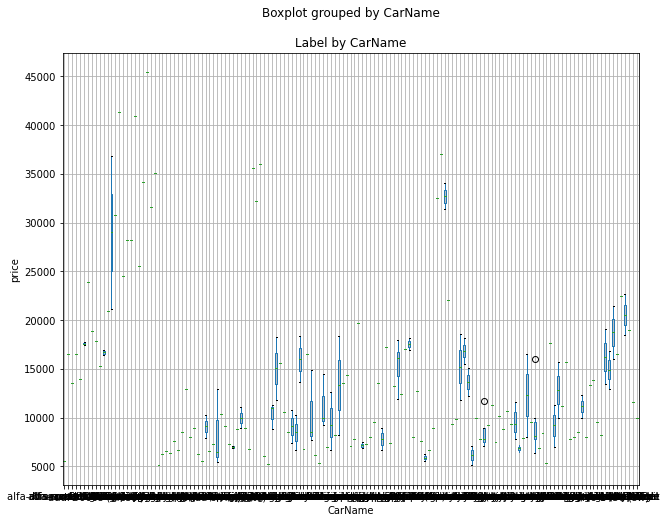

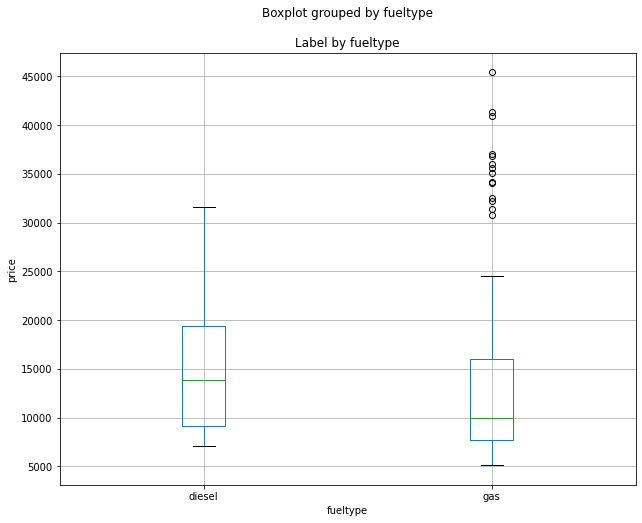

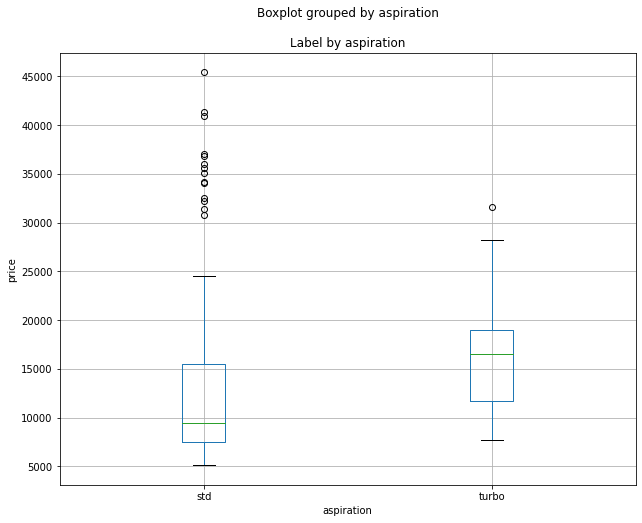

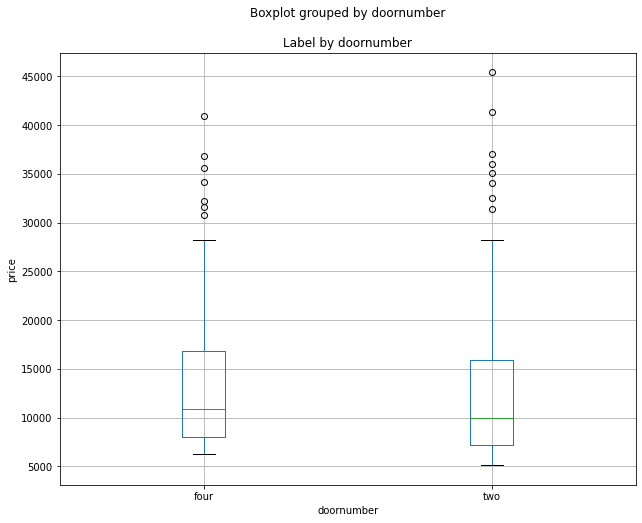

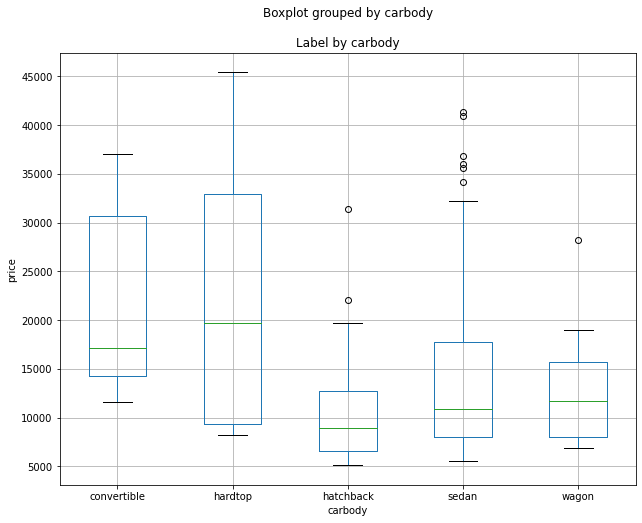

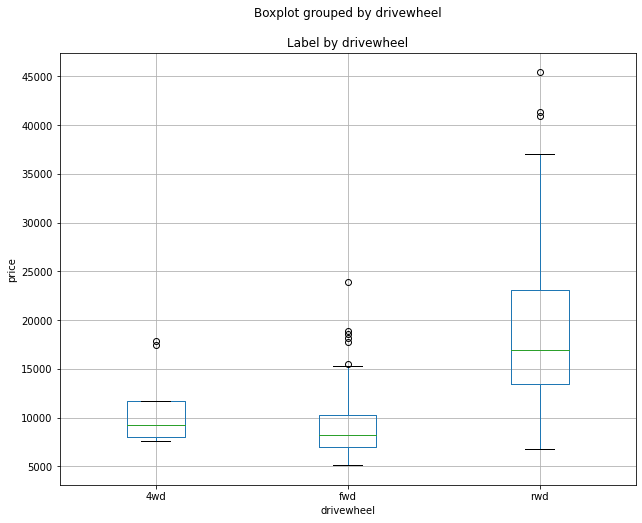

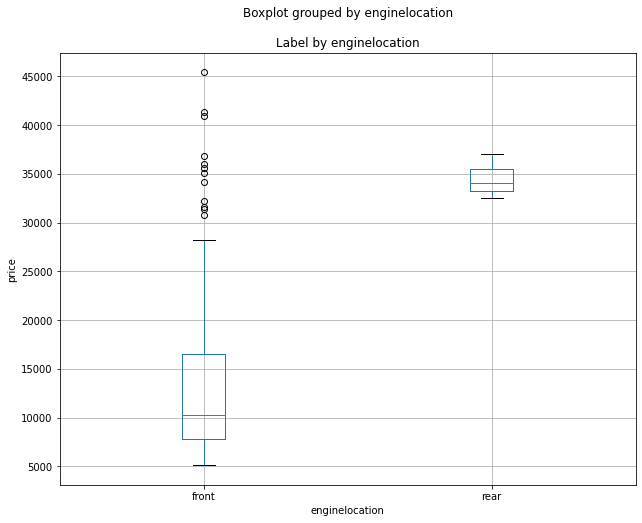

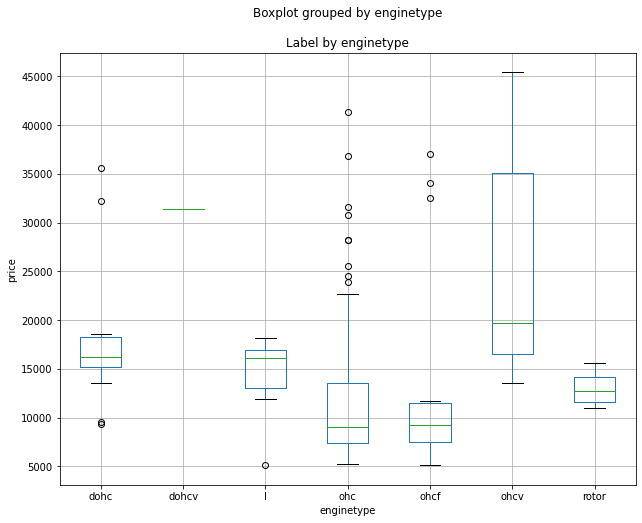

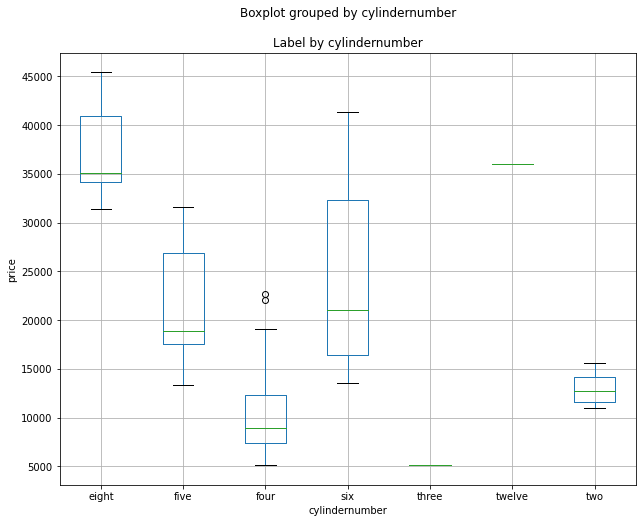

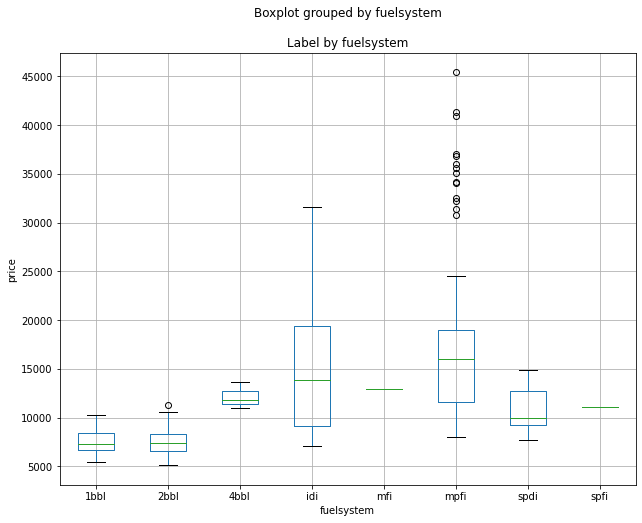

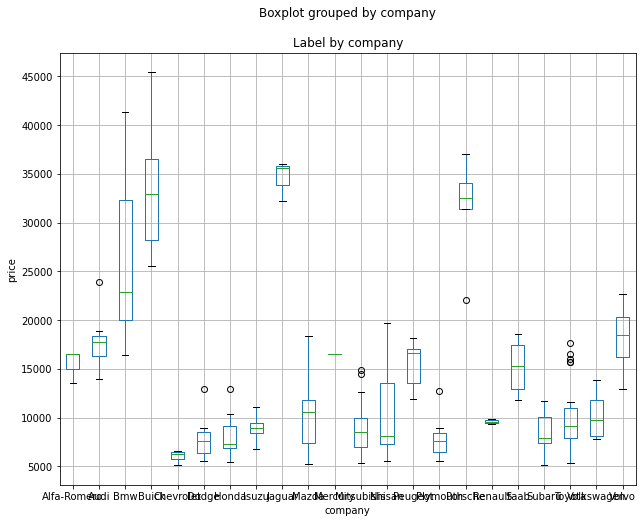

In [40]:
for col in categorical_features:
  fig=plt.figure(figsize=(10,8))
  ax=fig.gca()
  df.boxplot(column='price',by=col,ax=ax)
  ax.set_title('Label by '+ col)
  ax.set_ylabel('price')
plt.show()

<Figure size 720x576 with 0 Axes>

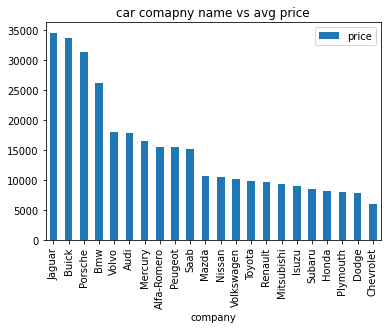

In [41]:
plt.figure(figsize=(10,8))

df_autox=pd.DataFrame(df.groupby(['company'])['price'].mean().sort_values(ascending=False))
df_autox.plot.bar()
plt.title('car comapny name vs avg price')
plt.show()


In [42]:
df_autox.rename(columns={'price':'price_mean'},inplace=True)


In [43]:
df=df.merge(df_autox, on='company',how='left')

In [44]:
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,milege,area,company,price_mean
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,9.0,111,5000,21,27,13495.0,23.4,10820.08,Alfa-Romero,15498.333333
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,9.0,111,5000,21,27,16500.0,23.4,10820.08,Alfa-Romero,15498.333333
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,9.0,154,5000,19,26,16500.0,21.8,11213.60,Alfa-Romero,15498.333333
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,10.0,102,5500,24,30,13950.0,26.4,11690.92,Audi,17859.166714
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,8.0,115,5500,18,22,17450.0,19.6,11726.24,Audi,17859.166714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,9.5,114,5400,23,28,16845.0,25.0,13008.32,Volvo,18063.181818
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,8.7,160,5300,19,25,19045.0,21.4,12989.44,Volvo,18063.181818
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,8.8,134,5500,18,23,21485.0,20.0,13008.32,Volvo,18063.181818
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,23.0,106,4800,26,27,22470.0,26.4,13008.32,Volvo,18063.181818


In [45]:
df['company_cat']=df['price_mean'].apply(lambda x:0 if x <12000 else (1 if 12000<=x<24000 else 2))

In [46]:
df['company_cat'].value_counts()

0    142
1     39
2     24
Name: company_cat, dtype: int64

In [47]:
# corelation Price
correlation.price

car_ID             -0.109093
symboling          -0.079978
wheelbase           0.577816
carlength           0.682920
carwidth            0.759325
carheight           0.119336
curbweight          0.835305
enginesize          0.874145
boreratio           0.553173
stroke              0.079443
compressionratio    0.067984
horsepower          0.808139
peakrpm            -0.085267
citympg            -0.685751
highwaympg         -0.697599
price               1.000000
Name: price, dtype: float64

In [48]:
dataset_pr=df.copy()

In [49]:
df.fuelsystem.value_counts()

mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: fuelsystem, dtype: int64

In [50]:
#Data encoding
encoders_nums={'fueltype':{'diesel':1,'gas':0},
               'aspiration':{'turbo':1,'std':0},
               'doornumber':{'four':4,'two':2},
               'drivewheel':{'fwd':0,'4wd':0,'rwd':1},
               'cylindernumber':{'four':4,'six':6,'five':5,'eight':8,'two':2,'twelve':12, 'three':3}}

dataset_pr=dataset_pr.replace(encoders_nums)

In [51]:
#one hot encoding

dataset_pr=pd.get_dummies(dataset_pr,columns=["carbody",'enginetype','fuelsystem'],prefix=['body','etype','fsystem'])



In [52]:
dataset_pr.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,drivewheel,enginelocation,wheelbase,carlength,...,etype_ohcv,etype_rotor,fsystem_1bbl,fsystem_2bbl,fsystem_4bbl,fsystem_idi,fsystem_mfi,fsystem_mpfi,fsystem_spdi,fsystem_spfi
0,1,3,alfa-romero giulia,0,0,2,1,front,88.6,168.8,...,0,0,0,0,0,0,0,1,0,0
1,2,3,alfa-romero stelvio,0,0,2,1,front,88.6,168.8,...,0,0,0,0,0,0,0,1,0,0
2,3,1,alfa-romero Quadrifoglio,0,0,2,1,front,94.5,171.2,...,1,0,0,0,0,0,0,1,0,0
3,4,2,audi 100 ls,0,0,4,0,front,99.8,176.6,...,0,0,0,0,0,0,0,1,0,0
4,5,2,audi 100ls,0,0,4,0,front,99.4,176.6,...,0,0,0,0,0,0,0,1,0,0


In [53]:
features=numerical_features.copy()

features.extend(['fueltype','aspiration','doornumber','drivewheel','cylindernumber',
                 'company_cat','body_convertible','body_hardtop','body_hatchback','body_sedan','body_wagon',
                 'etype_dohc','etype_l','etype_ohc','etype_ohcf','etype_ohcv',
                 'fsystem_1bbl','fsystem_2bbl','fsystem_idi','fsystem_mpfi','fsystem_spdi'])

In [54]:
features

['enginesize',
 'compressionratio',
 'milege',
 'fueltype',
 'aspiration',
 'doornumber',
 'drivewheel',
 'cylindernumber',
 'company_cat',
 'body_convertible',
 'body_hardtop',
 'body_hatchback',
 'body_sedan',
 'body_wagon',
 'etype_dohc',
 'etype_l',
 'etype_ohc',
 'etype_ohcf',
 'etype_ohcv',
 'fsystem_1bbl',
 'fsystem_2bbl',
 'fsystem_idi',
 'fsystem_mpfi',
 'fsystem_spdi']

In [55]:
len(features)

24

In [56]:
from scipy.stats import zscore

X=dataset_pr[features].apply(zscore)

In [57]:
X

,enginesize,compressionratio,milege,fueltype,aspiration,doornumber,drivewheel,cylindernumber,company_cat,body_convertible,...,etype_dohc,etype_l,etype_ohc,etype_ohcf,etype_ohcv,fsystem_1bbl,fsystem_2bbl,fsystem_idi,fsystem_mpfi,fsystem_spdi
0,0.074449,-0.288349,-0.609359,-0.328798,-0.469295,-1.130388,1.302831,-0.352887,0.832184,5.759051,...,4.010403,-0.249351,-1.611363,-0.280976,-0.260208,-0.23812,-0.689072,-0.328798,1.086670,-0.214286
1,0.074449,-0.288349,-0.609359,-0.328798,-0.469295,-1.130388,1.302831,-0.352887,0.832184,5.759051,...,4.010403,-0.249351,-1.611363,-0.280976,-0.260208,-0.23812,-0.689072,-0.328798,1.086670,-0.214286
2,0.604046,-0.288349,-0.851157,-0.328798,-0.469295,-1.130388,1.302831,1.502032,0.832184,-0.173640,...,-0.249351,-0.249351,-1.611363,-0.280976,3.843076,-0.23812,-0.689072,-0.328798,1.086670,-0.214286
3,-0.431076,-0.035973,-0.155989,-0.328798,-0.469295,0.884652,-0.767559,-0.352887,0.832184,-0.173640,...,-0.249351,-0.249351,0.620593,-0.280976,-0.260208,-0.23812,-0.689072,-0.328798,1.086670,-0.214286
4,0.218885,-0.540725,-1.183629,-0.328798,-0.469295,0.884652,-0.767559,0.574572,0.832184,-0.173640,...,-0.249351,-0.249351,0.620593,-0.280976,-0.260208,-0.23812,-0.689072,-0.328798,1.086670,-0.214286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,0.339248,-0.162161,-0.367562,-0.328798,-0.469295,0.884652,1.302831,-0.352887,0.832184,-0.173640,...,-0.249351,-0.249351,0.620593,-0.280976,-0.260208,-0.23812,-0.689072,-0.328798,1.086670,-0.214286
201,0.339248,-0.364062,-0.911606,-0.328798,2.130854,0.884652,1.302831,-0.352887,0.832184,-0.173640,...,-0.249351,-0.249351,0.620593,-0.280976,-0.260208,-0.23812,-0.689072,-0.328798,1.086670,-0.214286
202,1.109571,-0.338824,-1.123179,-0.328798,-0.469295,0.884652,1.302831,1.502032,0.832184,-0.173640,...,-0.249351,-0.249351,-1.611363,-0.280976,3.843076,-0.23812,-0.689072,-0.328798,1.086670,-0.214286
203,0.435538,3.244916,-0.155989,3.041381,2.130854,0.884652,1.302831,1.502032,0.832184,-0.173640,...,-0.249351,-0.249351,0.620593,-0.280976,-0.260208,-0.23812,-0.689072,3.041381,-0.920243,-0.214286


In [58]:
y=np.log10(dataset_pr['price'])

In [59]:
X_train, X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

print(X_train.shape)
print(X_test.shape)

(164, 24)
(41, 24)


In [60]:
reg=LinearRegression()

reg.fit(X_train,y_train)

reg.score(X_train,y_train)

0.9324420504983304

In [61]:
reg.score?

In [62]:
reg.coef_

array([ 0.07683825,  0.01590146, -0.05608906,  0.00149697,  0.02135358,
        0.01543893,  0.01238109,  0.00031735,  0.06565892,  0.01437322,
        0.0005336 , -0.00028112,  0.00042538, -0.00796079, -0.04125975,
       -0.05110849, -0.0658886 , -0.03672994, -0.04472375, -0.00052948,
       -0.01768536,  0.00149697,  0.01790728, -0.00753211])

In [63]:
reg.intercept_

4.059743198935876

In [64]:
len(reg.coef_)

24

In [65]:
y_pred_train=reg.predict(X_train)
y_pred_train

array([4.22082914, 4.512026  , 4.12985032, 4.07990455, 3.86678401,
       3.85198643, 4.09698771, 4.08015334, 3.99322121, 4.28017404,
       3.83114072, 3.88343622, 3.92118328, 4.26466751, 4.15481411,
       3.97350235, 4.29367207, 4.00925583, 3.85054113, 3.71364178,
       4.16240568, 3.96017347, 3.95373863, 4.11445435, 4.18207908,
       3.95842314, 3.76768019, 3.86958683, 3.84314453, 3.85223087,
       3.90981585, 3.81967552, 3.90509678, 3.8900044 , 4.19880537,
       3.86832486, 4.13566249, 3.90011355, 4.21600691, 4.14358365,
       4.37714442, 4.02048827, 4.19880537, 3.99322121, 4.42670967,
       4.00187102, 4.11604288, 4.21566427, 3.89399842, 3.95373863,
       4.19270827, 3.92118328, 3.94510973, 4.12262139, 3.97896763,
       4.21224039, 4.11048216, 4.66465236, 4.21057845, 3.8787058 ,
       3.79779136, 3.83911777, 4.12097995, 3.84314453, 3.77874448,
       3.79906303, 4.26849174, 3.84849519, 4.23148664, 3.8372148 ,
       4.19880537, 3.8357695 , 3.95229333, 3.96937102, 4.03067

In [66]:
y_pred_test=reg.predict(X_test)
y_pred_test

array([3.81967552, 4.13714622, 4.17646819, 3.56301623, 4.00910128,
       4.0881102 , 3.78244388, 3.86958683, 4.15481411, 3.87647818,
       4.3307769 , 4.57347531, 4.11445435, 4.05412396, 3.80023554,
       4.08476194, 4.03989491, 4.18239791, 3.92761811, 3.85263527,
       3.97322164, 4.13566249, 4.03251989, 4.08476194, 4.14866948,
       3.84357219, 3.87365512, 4.11048216, 3.89255312, 3.8372148 ,
       3.96211116, 3.98838418, 4.32026565, 4.00589168, 3.86832486,
       4.45577252, 4.07673423, 4.17242568, 3.81943108, 4.62804648,
       3.76912549])

In [67]:
from sklearn.metrics import mean_squared_error,r2_score

In [70]:
MSE=mean_squared_error(10**(y_test),10**(y_pred_test))

print("MSE:",MSE)

MSE: 8981848.585185645


In [71]:
RMSE=np.sqrt(MSE)
print('RMSE :',RMSE)

RMSE : 2996.9732373155493


In [72]:
r2_score(y_train, y_pred_train), reg.score(X_train,y_train)

(0.9324420504983304, 0.9324420504983304)

In [73]:
r2_score(y_test, y_pred_test), reg.score(X_test, y_test)

(0.8734189235758099, 0.8734189235758099)

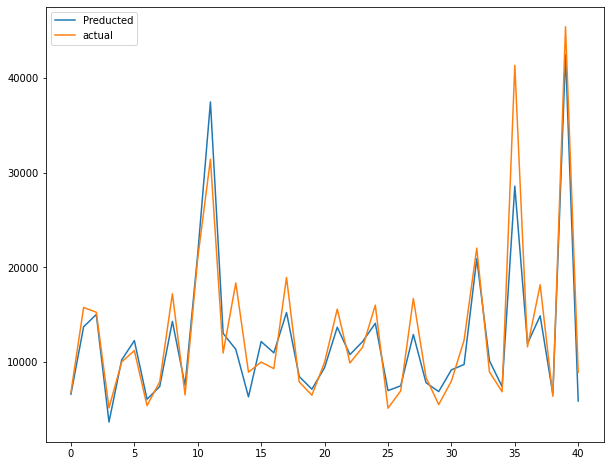

In [76]:
plt.figure(figsize=(10,8))
plt.plot(10**(y_pred_test))
plt.plot(np.array(10**(y_test)))
plt.legend(['Preducted','actual'])
plt.show()

In [77]:
from sklearn.linear_model import Lasso

lasso=Lasso(alpha=0.0001, max_iter=3000)

lasso.fit(X_train,y_train)



Lasso(alpha=0.0001, max_iter=3000)

In [78]:
lasso.score(X_train,y_train),  lasso.score(X_test,y_test)

(0.9323894941242676, 0.8748781427186809)

In [ ]:
lasso.coef_

In [80]:
## cross validation

from sklearn.model_selection import GridSearchCV

lasso=Lasso()

parameters={'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,0.0014]}

lasso_regressor=GridSearchCV(lasso,parameters, scoring='neg_mean_squared_error',cv=5)

lasso_regressor.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100, 0.0014]},
             scoring='neg_mean_squared_error')

In [81]:
lasso_regressor.best_score_

-0.004766757581452098

In [82]:
y_pred_lasso=lasso_regressor.predict(X_test)

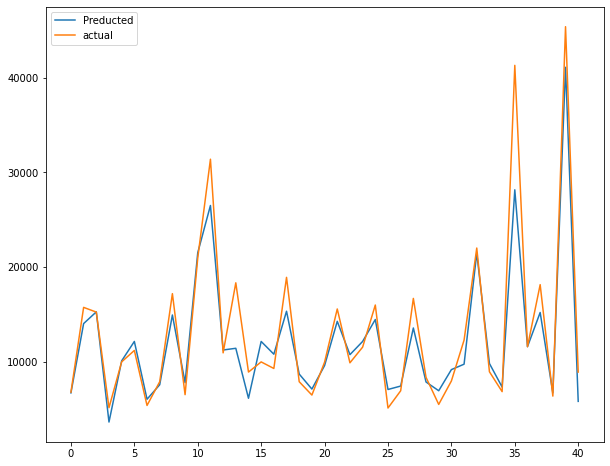

In [83]:
plt.figure(figsize=(10,8))
plt.plot(10**(y_pred_lasso))
plt.plot(np.array(10**(y_test)))
plt.legend(['Preducted','actual'])
plt.show()

In [90]:

from sklearn.metrics import mean_squared_error

MSE=mean_squared_error(10**(y_test),10**(y_pred_lasso))

print("MSE :", MSE)

RMSE=np.sqrt(MSE)

print("RMSE :", RMSE)

r2=r2_score(10**(y_test),10**(y_pred_lasso))

print("R2 :",r2)

adjusted_R2= 1-(1-r2_score(10**(y_test),10**(y_pred_lasso)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))

print("adjusted_R2  :", adjusted_R2)

MSE : 8638958.855898028
RMSE : 2939.210583795933
R2 : 0.8884091288419464
adjusted_R2  : 0.7210228221048661


In [93]:
## ridge regression
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

ridge=Ridge()

parameters={'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,0.0014]}

ridge_regressor=GridSearchCV(ridge,parameters, scoring='neg_mean_squared_error',cv=3)

ridge_regressor.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100, 0.0014]},
             scoring='neg_mean_squared_error')

In [96]:
print("ridge_regressor.best_params_: ",ridge_regressor.best_params_)

print("ridge_regressor.best_score_",ridge_regressor.best_score_)

ridge_regressor.best_params_:  {'alpha': 5}
ridge_regressor.best_score_ -0.005204770442303095


In [97]:
y_pred_ridge=ridge_regressor.predict(X_test)

In [98]:

from sklearn.metrics import mean_squared_error

MSE=mean_squared_error(10**(y_test),10**(y_pred_ridge))

print("MSE :", MSE)

RMSE=np.sqrt(MSE)

print("RMSE :", RMSE)

r2=r2_score(10**(y_test),10**(y_pred_ridge))

print("R2 :",r2)

adjusted_R2= 1-(1-r2_score(10**(y_test),10**(y_pred_ridge)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))

print("adjusted_R2  :", adjusted_R2)

MSE : 8476786.746703872
RMSE : 2911.4921855817975
R2 : 0.8905039330011489
adjusted_R2  : 0.7262598325028724
